In [1]:
import os, sys

import numpy as np
import pandas as pd
import time, random, math
import copy
from collections import deque
from tqdm import notebook as tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from torch import nn
import torch
from torch.optim import Adam
from torch.distributions import Categorical

In [2]:
from method_1 import SearchAvailablePosition
from method_2 import SearchAction
from method_3 import ChangeBoard

from Othello import Othello

In [3]:
from RL.train_model import test, get_play_data, randomAgent, greedyAgent
#from RL.model import Model, basis_conv2d
from RL.optimize_model import optimize_a2cmodel as optimize_model
from RL.A2C_agent import agent as a2c_agent
from RL.DQN_agent import agent as dqn_agent
from RL.Replay_Memory import Replay_Memory
#test()

In [4]:
#model = Model(3)
#optimizer = Adam(model.parameters(), lr=1e-4)
#batch_size=128

#agent_1 = randomAgent()
#agent_2 = greedyAgent()
agent_1 = a2c_agent(input_dim=3, lam=0.6, gamma=.9, lr=1e-4)
agent_2 = dqn_agent(input_dim=3, lam=0.6, gamma=.9, lr=1e-4)

data_first, data_secound = get_play_data(agent_1, agent_2)

In [5]:
data_secound['rewards']

tensor([5.0000, 0.8400, 0.8400, 0.8200, 0.8200, 0.8200, 0.8000, 0.8000, 0.7800,
        0.7600, 0.7400, 0.7400, 0.7400, 0.7200, 0.7000, 0.7000, 0.7000, 0.7000,
        0.7000, 0.7000, 0.7000, 0.6800, 0.6800, 0.6600, 0.6600, 0.6400, 0.6400,
        0.6400, 0.6400, 0.6400, 0.6400, 0.6400, 0.6200, 0.6200, 0.6200, 0.6200,
        0.6200, 0.6000, 0.5800, 0.5600, 0.5600, 0.5400, 0.5400, 0.5200, 0.5000,
        0.5000, 0.4800, 0.4800, 0.4600, 0.4400, 0.4400, 0.4400, 0.4200, 0.4000,
        0.4000, 0.4000, 0.4000, 0.3800, 0.3800, 0.3800, 0.3800, 0.3600, 0.3400,
        0.3400, 0.3200, 0.3200, 0.3200, 0.3000, 0.3200, 0.3600, 0.3800, 0.2800,
        0.2800, 0.2800, 0.3000, 0.3200, 0.3000, 0.2800, 0.3000, 0.3000, 0.3000,
        0.3200, 0.4000, 0.4200, 0.4400, 0.4600, 0.4400, 0.3400, 0.2800, 0.2600,
        0.2600, 0.2800, 0.2800, 0.2800, 0.3000, 0.3200, 0.3200, 0.3400, 0.3400,
        0.3200, 0.3200, 0.3000, 0.3000, 0.2800, 0.2600, 0.2600, 0.2600, 0.2400,
        0.2200, 0.2200, 0.2000, 0.1800])

In [6]:
data_secound['states'][0,1,:,:].sum()/50

tensor(0.8200)

In [7]:
(data_first['states'][0,0,:,:]).sum()

tensor(23.)

In [8]:
win_1 = []
win_2 = []
l=[]
random_agent = randomAgent()
greedy_agent = greedyAgent()
memory = Replay_Memory(50)

In [9]:
for i in tqdm(range(200)):
    for _ in range(2):
        tmp_w_1 = 0
        tmp_w_2 = 0
        data_1, data_2 = get_play_data(agent_1 , agent_2)
        memory.push(data_1)
        memory.push(data_2)
        tmp_w_1+=int(data_1['rewards'][0]/5)
        tmp_w_2+=int(data_2['rewards'][0]/5)
        
    win_1.append(tmp_w_1)    
    win_2.append(tmp_w_2)    
    agent_1.optimize_model(memory)
    agent_2.optimize_model(memory)

c:\users\abcdm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


KeyboardInterrupt: 

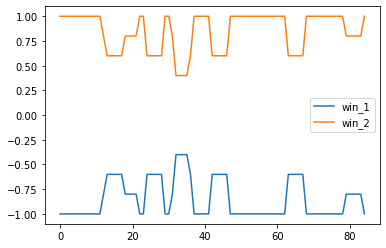

In [10]:
win_1_df = pd.DataFrame(win_1).rolling(5,min_periods=1).mean()
plt.plot(win_1_df, label='win_1')
win_2_df = pd.DataFrame(win_2).rolling(5,min_periods=1).mean()
plt.plot(win_2_df, label='win_2')
plt.legend()
plt.show()

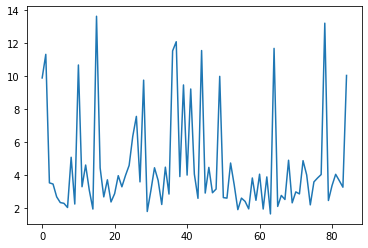

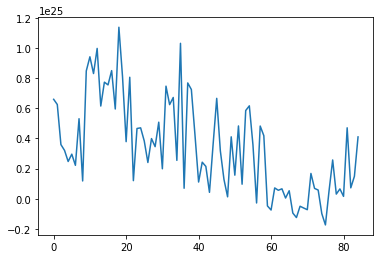

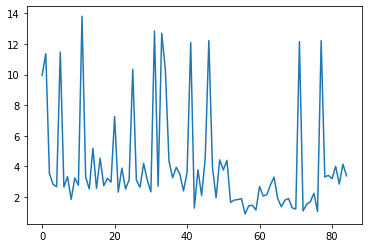

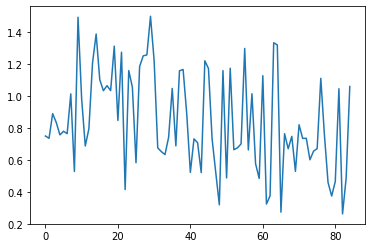

In [12]:
plt.plot(agent_2.loss_1_list)
plt.show()

plt.plot(agent_1.loss_1_list)
plt.show()

plt.plot(agent_1.loss_2_list)
plt.show()

plt.plot(agent_1.loss_3_list)
plt.show()

In [13]:
s = torch.cat([transaction['states'] for transaction in list(memory.memory)[:1]], dim=0)
policy = agent_1.model(s)["policy"]
policy = policy[[2]].detach().numpy()[0]

In [14]:
policy.argmax()

21

In [15]:
a = list(np.where(policy>-1e10)[0])
[random.choice(a) for _ in range(10)]

[21, 21, 19, 19, 19, 19, 37, 37, 37, 21]

In [16]:
s = torch.cat([transaction['states'] for transaction in list(memory.memory)[:1]], dim=0)
policy = agent_1.model(s)["policy"]
print(s[:,2,:,:].flatten(1).gather(1, policy.argsort(1))[:,-4:].tolist())

[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 1.0, 1.0]]


In [20]:
!pip install -U seaborn

You should consider upgrading via the 'c:\users\abcdm\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


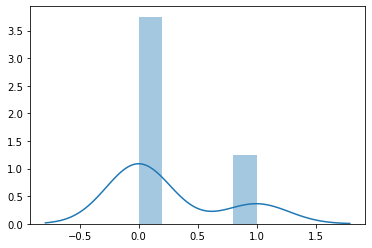

In [22]:
sns.distplot(s[:,2,:,:].flatten(1).gather(1, policy.argsort(1))[:,-4:].detach().numpy().flatten())
plt.show()

In [23]:
random_agent = randomAgent()

In [24]:
othello = Othello()

w_1=0
w_2=0
draw=0

In [25]:
for _ in tqdm(range(2000)):
    board, changeable_Pos, Position_Row, Position_Col, Change_Position, done = othello.make()
    while not done:
        if othello.color==1:
            setrow, setcol = agent_1.take_action(board, changeable_Pos, Position_Row, Position_Col, Change_Position)
        else:
            setrow, setcol = random_agent.take_action(board, changeable_Pos, Position_Row, Position_Col, Change_Position)
        board, changeable_Pos, Position_Row, Position_Col, Change_Position, done = othello.step(setrow, setcol)
        if done:
            if len(board[board==1])>len(board[board==2]):
                w_1+=1
            elif len(board[board==1])<len(board[board==2]):
                w_2+=1
            else:
                draw+=1

c:\users\abcdm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


KeyboardInterrupt: 

In [26]:
print(w_1,w_2,draw)

122 146 9


In [27]:
othello = Othello()

w_1=0
w_2=0
draw=0

In [30]:
for _ in tqdm(range(2000)):
    board, changeable_Pos, Position_Row, Position_Col, Change_Position, done = othello.make()
    while not done:
        if othello.color==1:
            setrow, setcol = random_agent.take_action(board, changeable_Pos, Position_Row, Position_Col, Change_Position)
        else:
            setrow, setcol = agent_2.take_action(board, changeable_Pos, Position_Row, Position_Col, Change_Position)
        board, changeable_Pos, Position_Row, Position_Col, Change_Position, done = othello.step(setrow, setcol)
        if done:
            if len(board[board==1])>len(board[board==2]):
                w_1+=1
            elif len(board[board==1])<len(board[board==2]):
                w_2+=1
            else:
                draw+=1

c:\users\abcdm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [31]:
print(w_1,w_2,draw)

210 1973 108
